In [1]:
import numpy as np
from Boosting import ada_boost

dat_mat, class_labels = ada_boost.load_simple_data()
d = np.mat(np.ones((5, 1)) / 5)
ada_boost.build_stump(dat_mat, class_labels, d)

({'dim': 0, 'thres': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [5]:
classifier_array = ada_boost.ada_boost_decision_stump(dat_mat, class_labels, 9)

example weights:  [[0.2 0.2 0.2 0.2 0.2]]
class est:  [[-1.  1. -1. -1.  1.]]
agg class est:  [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
example weights:  [[0.4 0.1 0.1 0.1 0.1]]
class est:  [[ 1.  1. -1. -1. -1.]]
agg class est:  [[ 0.40546511  1.79175947 -1.79175947 -1.79175947 -0.40546511]]
total error:  0.2
example weights:  [[0.16666667 0.04166667 0.04166667 0.04166667 0.375     ]]
class est:  [[1. 1. 1. 1. 1.]]
agg class est:  [[ 1.60441274  2.99070711 -0.59281183 -0.59281183  0.79348253]]
total error:  0.0


In [6]:
print(classifier_array)

[{'dim': 0, 'thres': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453}, {'dim': 1, 'thres': 1.0, 'ineq': 'lt', 'alpha': 1.0986122886681098}, {'dim': 0, 'thres': 0.9, 'ineq': 'lt', 'alpha': 1.1989476363991851}]


In [11]:
import importlib
importlib.reload(ada_boost)

dat_arr, label_arr = ada_boost.load_simple_data()
classifier_arr = ada_boost.ada_boost_decision_stump(dat_arr, label_arr, 30)
ada_boost.ada_classify([[5, 5], [0, 0]], classifier_arr)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.79175947]
 [-1.79175947]]
[[ 2.99070711]
 [-2.99070711]]


matrix([[ 1.],
        [-1.]])

In [29]:
import importlib
importlib.reload(ada_boost)

dat_arr, label_arr = ada_boost.load_data_set('Boosting/data/horseColicTraining2.txt')
classifier_arr = ada_boost.ada_boost_decision_stump(dat_arr, label_arr, 10)
print(classifier_arr)

total error:  0.2842809364548495
total error:  0.2842809364548495
total error:  0.2408026755852843
total error:  0.24749163879598662
total error:  0.24749163879598662
total error:  0.24414715719063546


total error:  0.23411371237458195
total error:  0.23076923076923078
total error:  0.22742474916387959
total error:  0.23411371237458195
[{'dim': 9, 'thresh': 3.0, 'ineq': 'gt', 'alpha': 0.4616623792657674}, {'dim': 17, 'thresh': 52.5, 'ineq': 'gt', 'alpha': 0.3895015169299633}, {'dim': 18, 'thresh': 62.300000000000004, 'ineq': 'lt', 'alpha': 0.3347868848928118}, {'dim': 3, 'thresh': 55.199999999999996, 'ineq': 'gt', 'alpha': 0.2840261041116809}, {'dim': 10, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.2313231678687746}, {'dim': 5, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.19986987120643232}, {'dim': 12, 'thresh': 1.2, 'ineq': 'lt', 'alpha': 0.169672512933372}, {'dim': 7, 'thresh': 1.2, 'ineq': 'gt', 'alpha': 0.16362899934361827}, {'dim': 4, 'thresh': 28.799999999999997, 'ineq': 'lt', 'alpha': 0.1423752349663521}, {'dim': 5, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.13668096074908587}]


In [30]:
import importlib
importlib.reload(ada_boost)

test_arr, test_label_arr = ada_boost.load_data_set('Boosting/data/horseColicTest2.txt')
prediction = ada_boost.ada_classify(test_arr, classifier_arr)

err_arr = np.mat(np.ones((67, 1)))
print(err_arr[prediction != np.mat(test_label_arr).T].sum())

16.0


In [26]:
np.shape(test_label_arr)

(67,)

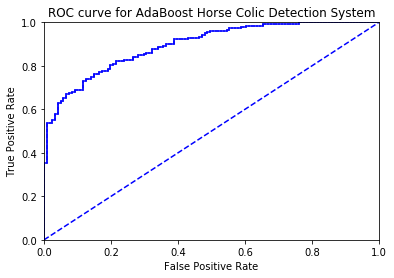

the Area Under the Curve is:  0.8949763209211629


In [41]:
%matplotlib inline 
import importlib
importlib.reload(ada_boost)

dat_arr, label_arr = ada_boost.load_data_set('Boosting/data/horseColicTraining2.txt')
classifier_arr, agg_class_est = ada_boost.ada_boost_decision_stump(dat_arr, label_arr, 50)
ada_boost.plot_roc(agg_class_est.T, label_arr)